# Assignment 6 - Weather

Plot the Knock airport weather data.

*Author: Eoghan Walsh*

## Import the modules.

In [101]:
# Imports.
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import AutoMinorLocator

## Import the data.

In [102]:
# Need to ignore the first 23 rows of the data.
weather = pd.read_csv("https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv",
                 skiprows=23)

C:\Users\eogha\AppData\Local\Temp\ipykernel_9628\1309464744.py:2: DtypeWarning: Columns (2,10,12,14,15,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  weather = pd.read_csv("https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv",


## First look at the data.

In [103]:
# Let's take a look at the first 5 rows.
weather.head()

,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,10-apr-1996 14:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,0,0,0,25,81,0.0,35000,32,5
1,31-jul-1996 08:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0,0,0,25,82,0.0,40000,45,5
2,31-jul-1996 09:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0,0,0,80,81,0.0,8000,32,7
3,31-jul-1996 10:00,0,0.0,0,12.9,0,11.3,9.8,0.0,0,...,0,0,0,0,25,82,0.0,28000,35,6
4,31-jul-1996 11:00,0,0.0,0,14.5,0,10.8,7.0,0.0,0,...,0,0,0,0,2,11,0.0,40000,40,6


In [104]:
# Let's drop the April row in the dataframe.
weather = weather[1:]

weather.head()

,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
1,31-jul-1996 08:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0,0,0,25,82,0.0,40000,45,5
2,31-jul-1996 09:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0,0,0,80,81,0.0,8000,32,7
3,31-jul-1996 10:00,0,0.0,0,12.9,0,11.3,9.8,0.0,0,...,0,0,0,0,25,82,0.0,28000,35,6
4,31-jul-1996 11:00,0,0.0,0,14.5,0,10.8,7.0,0.0,0,...,0,0,0,0,2,11,0.0,40000,40,6
5,31-jul-1996 12:00,0,0.0,0,14.4,0,10.9,7.3,0.0,0,...,0,0,0,0,1,82,0.0,40000,43,6


In [105]:
# Get some info on the columns.
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248393 entries, 1 to 248393
Data columns (total 21 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    248393 non-null  object 
 1   ind     248393 non-null  int64  
 2   rain    248393 non-null  object 
 3   ind.1   248393 non-null  int64  
 4   temp    248393 non-null  float64
 5   ind.2   248393 non-null  int64  
 6   wetb    248393 non-null  float64
 7   dewpt   248393 non-null  float64
 8   vappr   248393 non-null  float64
 9   rhum    248393 non-null  int64  
 10  msl     248393 non-null  object 
 11  ind.3   248393 non-null  int64  
 12  wdsp    248393 non-null  object 
 13  ind.4   248393 non-null  int64  
 14  wddir   248393 non-null  object 
 15  ww      248393 non-null  object 
 16  w       248393 non-null  object 
 17  sun     248393 non-null  float64
 18  vis     248393 non-null  object 
 19  clht    248393 non-null  object 
 20  clamt   248393 non-null  object 
dtypes: float64

## Update the date column to a pandas datetime object

In [106]:
# Update the date column dtype to datetime.
weather["date"] = pd.to_datetime(weather["date"], format="%d-%b-%Y %H:%M")

print(weather["date"].dtype)

datetime64[ns]


## Plot the temperature.

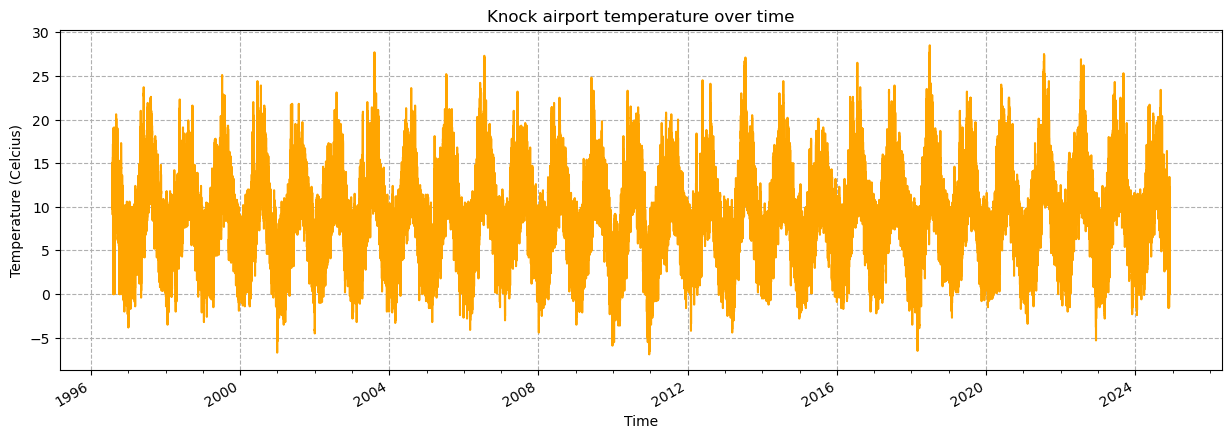

In [107]:
# Plot temperature (temp) over time (date).
x = weather["date"]
y = weather["temp"]

fig, ax = plt.subplots(figsize=(15, 5))

ax.plot(x, y, color="orange")

ax.set_title("Knock airport temperature over time")
ax.set_xlabel("Time")
ax.set_ylabel("Temperature (Celcius)")

# Format x axis.
# References:
# https://matplotlib.org/stable/api/dates_api.html#matplotlib.dates.ConciseDateFormatter
# https://matplotlib.org/stable/gallery/showcase/anatomy.html
# https://matplotlib.org/stable/api/_as_gen/matplotlib.figure.Figure.autofmt_xdate.html
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
fig.autofmt_xdate()

ax.grid(linestyle="--")

plt.show()

## Set the date column as the dataframe index.

In [108]:
# Create new dataframe using date column as index.
weather = weather.set_index("date")

weather.head()

,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,msl,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
date,,,,,,,,,,,,,,,,,,,,
1996-07-31 08:00:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,1011.4,0,0,0,0,25,82,0.0,40000,45,5
1996-07-31 09:00:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,1011.4,0,0,0,0,80,81,0.0,8000,32,7
1996-07-31 10:00:00,0,0.0,0,12.9,0,11.3,9.8,0.0,0,1011.2,0,0,0,0,25,82,0.0,28000,35,6
1996-07-31 11:00:00,0,0.0,0,14.5,0,10.8,7.0,0.0,0,1011.0,0,0,0,0,2,11,0.0,40000,40,6
1996-07-31 12:00:00,0,0.0,0,14.4,0,10.9,7.3,0.0,0,1010.9,0,0,0,0,1,82,0.0,40000,43,6


## Get the daily mean temperature.

In [109]:
# Resample the data to get the daily mean temperature.
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html#pandas-dataframe-resample
daily_temp_resample = weather["temp"].resample("D").mean()

daily_temp_resample.head()

date
1996-07-31    12.650000
1996-08-01    11.666667
1996-08-02    12.504167
1996-08-03    14.266667
1996-08-04    13.987500
Freq: D, Name: temp, dtype: float64

In [110]:
# Drop the NaN values.
mean_temp_daily = daily_temp_resample.dropna()

## Plot the daily mean temperature.

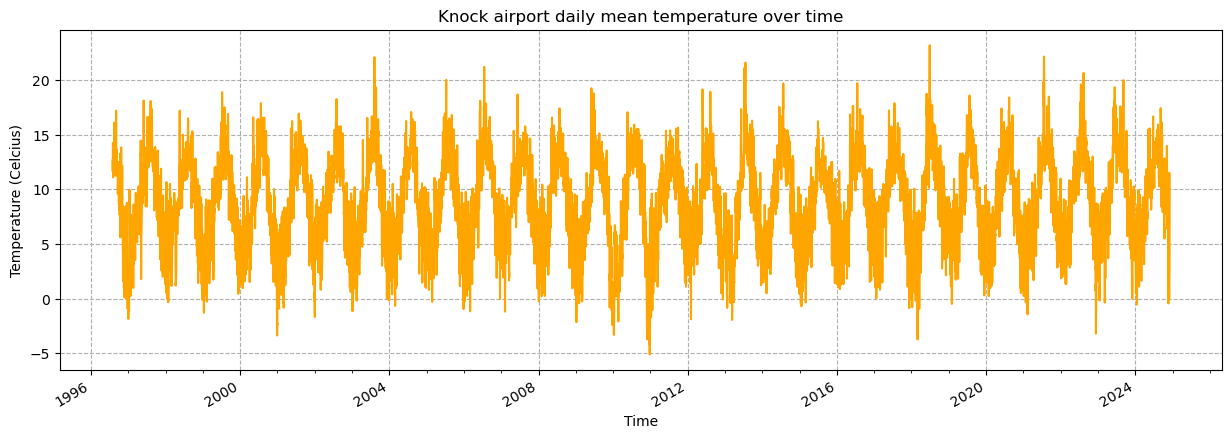

In [111]:
# Plot.
fig, ax = plt.subplots(figsize=(15, 5))

ax.plot(mean_temp_daily, color="orange")

ax.set_title("Knock airport daily mean temperature over time")
ax.set_xlabel("Time")
ax.set_ylabel("Temperature (Celcius)")

locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
fig.autofmt_xdate()

ax.grid(linestyle="--")

plt.show()

## Get the monthly mean temperature.

In [112]:
# Resample the data to get the monthly mean temperature.
monthly_temp_resample = weather["temp"].resample("ME").mean()

monthly_temp_resample.head()

date
1996-07-31    12.650000
1996-08-31    12.946909
1996-09-30    12.174306
1996-10-31     9.614113
1996-11-30     4.909444
Freq: ME, Name: temp, dtype: float64

In [113]:
# Drop the NaN values
mean_temp_monthly = monthly_temp_resample.dropna()

## Plot the monthly mean temperature.

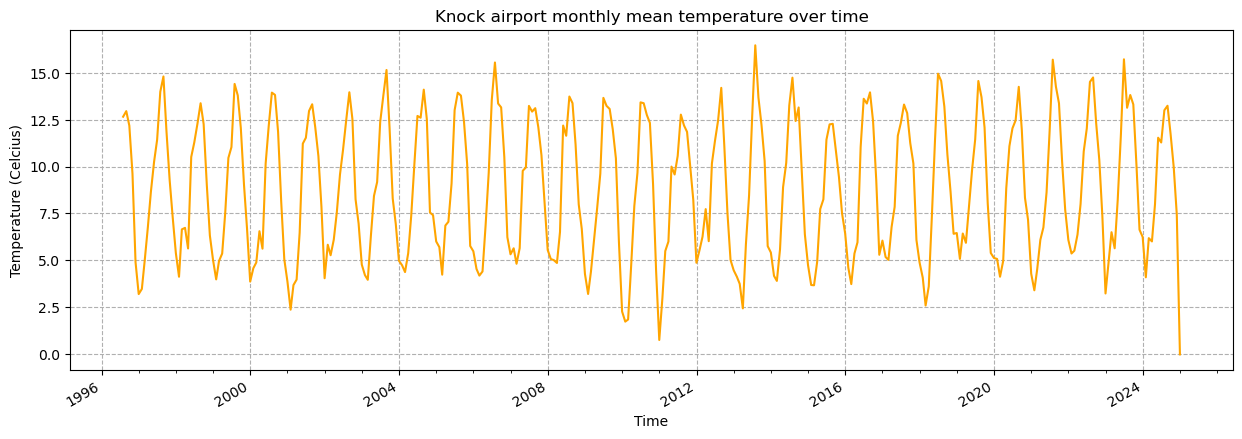

In [114]:
# Plot.
fig, ax = plt.subplots(figsize=(15, 5))

ax.plot(mean_temp_monthly, color="orange")

ax.set_title("Knock airport monthly mean temperature over time")
ax.set_xlabel("Time")
ax.set_ylabel("Temperature (Celcius)")

# Format x axis.
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
fig.autofmt_xdate()

ax.grid(linestyle="--")

plt.show()

## Plot the wind speed.

In [115]:
# Get some info on the windspeed column.
weather["wdsp"].info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 248393 entries, 1996-07-31 08:00:00 to 2024-12-01 00:00:00
Series name: wdsp
Non-Null Count   Dtype 
--------------   ----- 
248393 non-null  object
dtypes: object(1)
memory usage: 3.8+ MB


In [116]:
# Convert windspeed values to floats.
# https://pandas.pydata.org/docs/reference/api/pandas.to_numeric.html#pandas-to-numeric
windspeed = pd.to_numeric(weather["wdsp"], errors="coerce")

windspeed.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 248393 entries, 1996-07-31 08:00:00 to 2024-12-01 00:00:00
Series name: wdsp
Non-Null Count   Dtype  
--------------   -----  
248343 non-null  float64
dtypes: float64(1)
memory usage: 3.8 MB


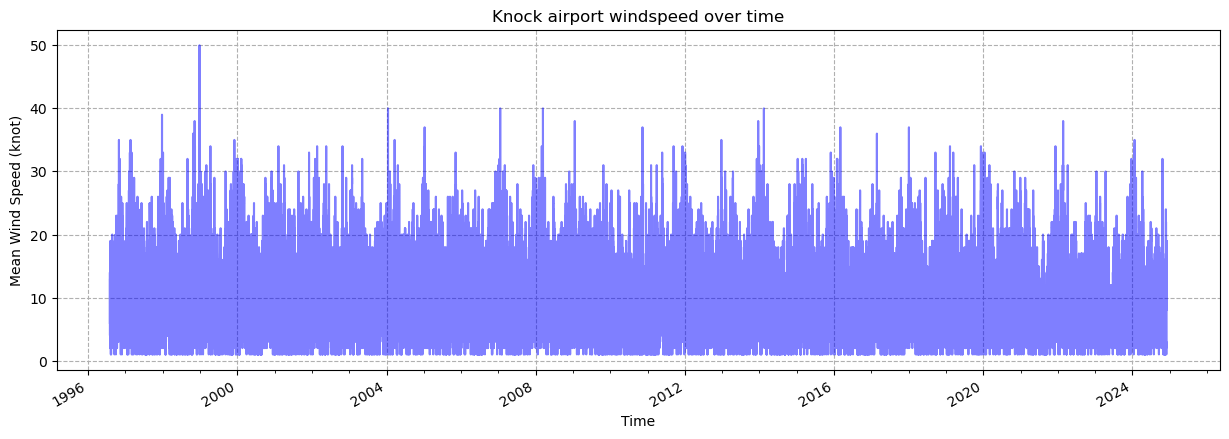

In [117]:
# Drop NaN's.
windspeed_na = windspeed.dropna()

# Drop zero values.
windspeed_clean = windspeed_na.loc[windspeed !=0]

# Plot
fig, ax = plt.subplots(figsize=(15, 5))

ax.plot(windspeed_clean, color="blue", alpha=0.5)

ax.set_title("Knock airport windspeed over time")
ax.set_xlabel("Time")
ax.set_ylabel("Mean Wind Speed (knot)")

# Format x axis.
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
fig.autofmt_xdate()

ax.grid(linestyle="--")

plt.show()

## Plot the rolling wind speed.

In [118]:
# Get the rolling windspeed over 24 hours.
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html#pandas-dataframe-rolling
start_date = "1996-08-01 00:00:00"

windspeed_rolling = windspeed_clean.loc[start_date:].rolling(window=24, min_periods=24).mean().dropna()

windspeed_rolling.head()

date
1996-08-02 01:00:00    9.958333
1996-08-02 02:00:00    9.916667
1996-08-02 03:00:00    9.791667
1996-08-02 04:00:00    9.666667
1996-08-02 05:00:00    9.583333
Name: wdsp, dtype: float64

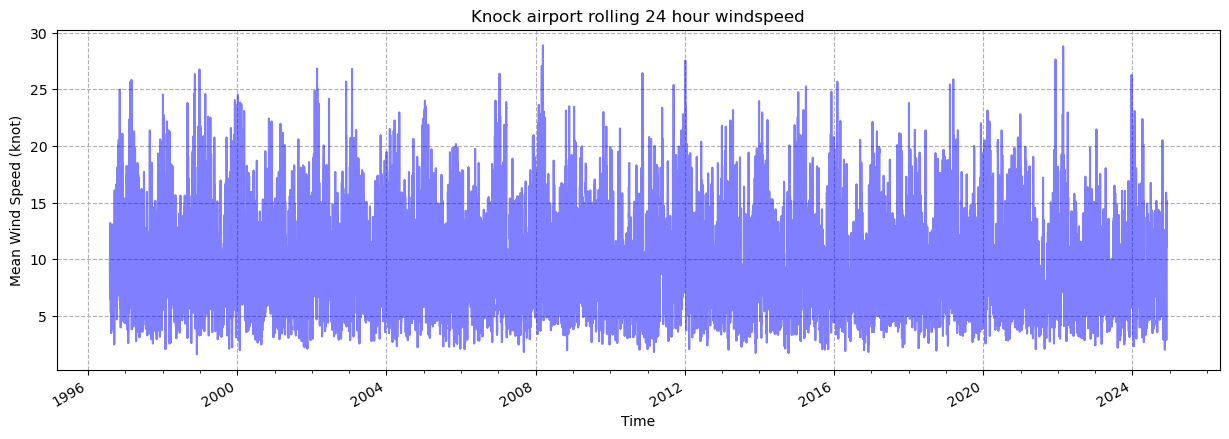

In [119]:
# Plot
fig, ax = plt.subplots(figsize=(15, 5))

ax.plot(windspeed_rolling, color="blue", alpha=0.5)

ax.set_title("Knock airport rolling 24 hour windspeed")
ax.set_xlabel("Time")
ax.set_ylabel("Mean Wind Speed (knot)")

# Format x axis.
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
fig.autofmt_xdate()

ax.grid(linestyle="--")

plt.show()

## Plot the max daily windspeed.

In [120]:
# Resample to get max daily wind speed.
max_daily_windspeed = windspeed_clean.resample("D").max()

max_daily_windspeed.head()

date
1996-08-01    14.0
1996-08-02    13.0
1996-08-03    10.0
1996-08-04    18.0
1996-08-05    14.0
Freq: D, Name: wdsp, dtype: float64

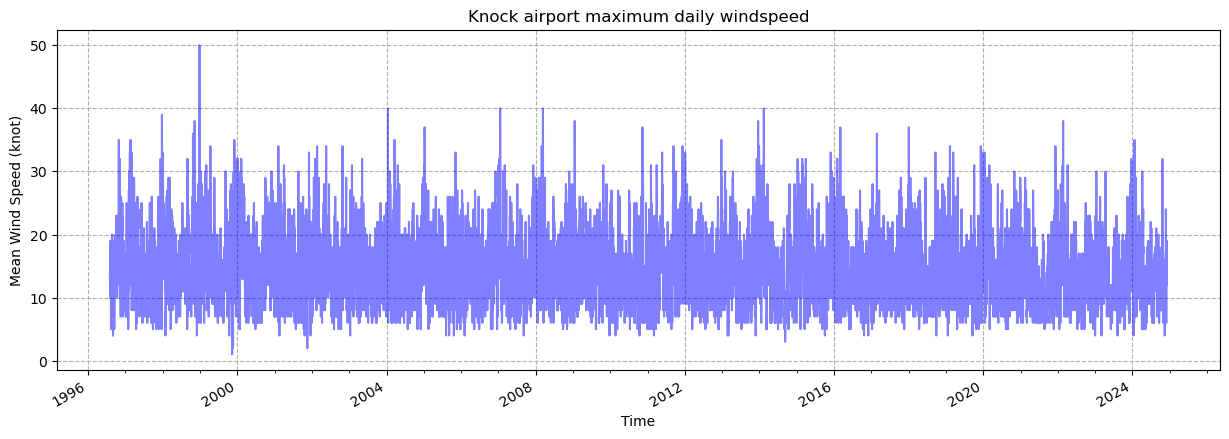

In [121]:
# Plot.
fig, ax = plt.subplots(figsize=(15, 5))

ax.plot(max_daily_windspeed, color="blue", alpha=0.5)

ax.set_title("Knock airport maximum daily windspeed")
ax.set_xlabel("Time")
ax.set_ylabel("Mean Wind Speed (knot)")

# Format x axis.
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
fig.autofmt_xdate()

ax.grid(linestyle="--")

plt.show()

## Plot the monthly mean of the max daily wind speeds.

In [122]:
# Resample to get the monthly mean of the max daily wind speed.
monthly_windspeed = max_daily_windspeed.resample("ME").mean()

monthly_windspeed.head()

date
1996-08-31    12.516129
1996-09-30    12.689655
1996-10-31    18.193548
1996-11-30    17.133333
1996-12-31    13.258065
Freq: ME, Name: wdsp, dtype: float64

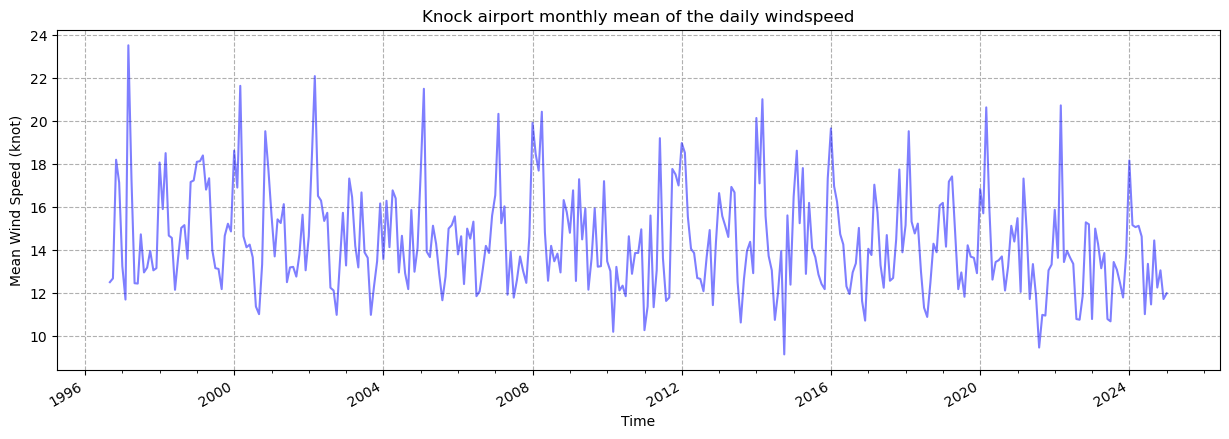

In [123]:
# Plot.
fig, ax = plt.subplots(figsize=(15, 5))

ax.plot(monthly_windspeed, color="blue", alpha=0.5)

ax.set_title("Knock airport monthly mean of the daily windspeed")
ax.set_xlabel("Time")
ax.set_ylabel("Mean Wind Speed (knot)")

# Format x axis.
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
fig.autofmt_xdate()

ax.grid(linestyle="--")

plt.show()

****
## End